In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
auto = pd.read_csv("../Data/Auto.csv", na_values="?").dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Scatterplot of all the variables

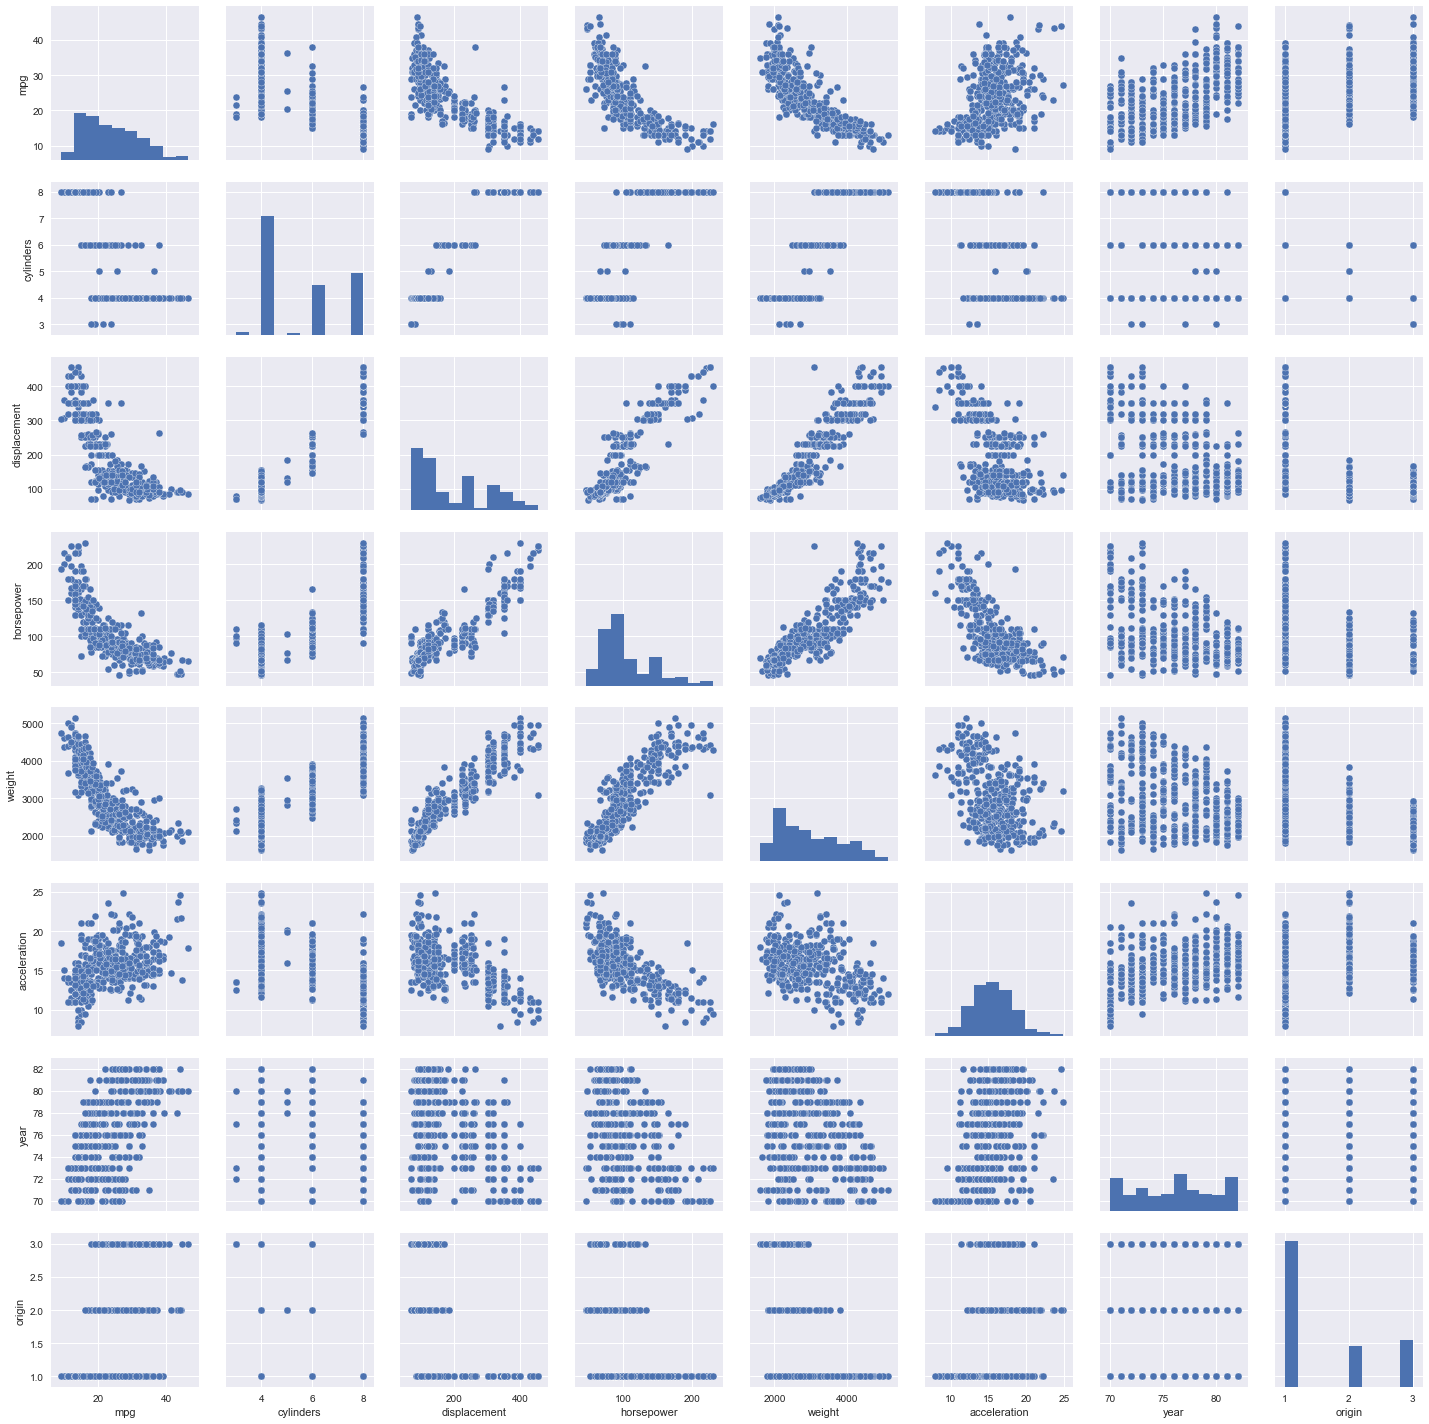

In [3]:
sns.pairplot(auto.iloc[:,0:8]);

### Correlation matrix

In [4]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### Multiple linear regression with *mpg* as response and all other variables except *name* as the predictors
This is a good deal easier to express in R, one would write :
```r
fit.lm <- lm(mpg~.-name, data=Auto)
summary(fit.lm)
```
In statsmodels/patsy there is no equivalent for R's `.`, see https://stackoverflow.com/questions/22388498/statsmodels-linear-regression-patsy-formula-to-include-all-predictors-in-model

In [5]:
columns = auto.columns.tolist()
columns.remove("mpg")
columns.remove("name")
formula = "mpg ~ " + "+".join(columns)
model = sm.ols(formula, auto)
results = model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2017-06-20 17:36 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight            -0.0065   0.0007 -9.9288 0.0000  -0.0078 -0.0052
acceleration       0.0806   0.0988  0.8152 0.4155  -0.1138  0.2749
year               0.7508   0.0510 14.7288 0.0000   0.6506  0.8510
origin             1.4261   0.2781  5.1275 0.0000   0.8793  1.9730
------------------------------------------------------------------
Omnibus:               31.906       Durbin-Watson:          1.309 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       53.100
Skew:                  0.529        Prob(JB):               0.000 
Kurtosis:              4.460        Condition No.:          85850 
==================================================================
* The condition number is large (9e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

*Origin*, *year*, *weight* and *displacement* have statistical significant relationships to *mpg*.

### Residuals and leverage plot

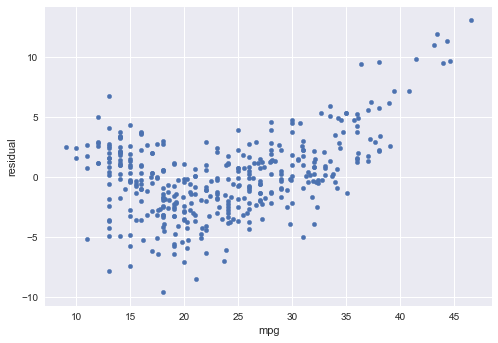

In [6]:
auto['predicted_mpg'] = results.predict()
auto['residual'] = results.resid
auto.plot.scatter(x= 'mpg', y='residual');

There is evidence of non-linearity.

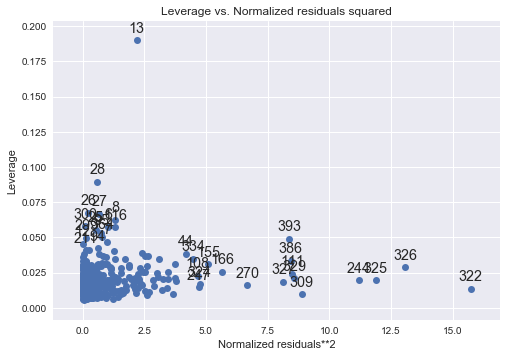

In [7]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(results);

Observation 13 has high leverage.

In [8]:
auto.iloc[13]

mpg                                   14
cylinders                              8
displacement                         455
horsepower                           225
weight                              3086
acceleration                          10
year                                  70
origin                                 1
name             buick estate wagon (sw)
predicted_mpg                    18.8802
residual                        -4.88015
Name: 13, dtype: object

### Simplifying the model by keeping only *weight*, *year*, and *origin* as predictors

In [9]:
sm.ols("mpg~weight+year+origin", auto).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.816    
Dependent Variable: mpg              AIC:                2063.6914
Date:               2017-06-20 17:36 BIC:                2079.5764
No. Observations:   392              Log-Likelihood:     -1027.8  
Df Model:           3                F-statistic:        579.2    
Df Residuals:       388              Prob (F-statistic): 7.26e-143
R-squared:          0.817            Scale:              11.206   
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept  -18.0459    4.0012   -4.5101  0.0000  -25.9126  -10.1791
weight      -0.0060    0.0003  -23.5883  0.0000   -0.0065   -0.0055
year         0.7571    0.0483   15.6676  0.0000    0.6621    0.8521
origin       1.1504    0.2591    4.4393  0.0000    0.6409    1.6599
------------------------------------------------------------------
Omnibus:               39.172       Durbin-Watson:          1.275 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       76.003
Skew:                  0.577        Prob(JB):               0.000 
Kurtosis:              4.823        Condition No.:          73300 
==================================================================
* The condition number is large (7e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

### Trying out some interaction effects, they seem to be statistical significant

In [10]:
sm.ols("mpg~weight+year*origin", auto).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.821    
Dependent Variable: mpg              AIC:                2053.2064
Date:               2017-06-20 17:36 BIC:                2073.0627
No. Observations:   392              Log-Likelihood:     -1021.6  
Df Model:           4                F-statistic:        450.4    
Df Residuals:       387              Prob (F-statistic): 4.02e-144
R-squared:          0.823            Scale:              10.883   
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept         8.7021   8.5249   1.0208 0.3080  -8.0588 25.4630
weight           -0.0062   0.0003 -24.0159 0.0000  -0.0067 -0.0057
year              0.4195   0.1066   3.9342 0.0001   0.2099  0.6291
origin          -14.8860   4.5386  -3.2799 0.0011 -23.8094 -5.9626
year:origin       0.2071   0.0585   3.5389 0.0005   0.0920  0.3221
------------------------------------------------------------------
Omnibus:               39.105       Durbin-Watson:          1.320 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       72.804
Skew:                  0.590        Prob(JB):               0.000 
Kurtosis:              4.751        Condition No.:          176272
==================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [11]:
sm.ols("mpg~weight*origin+year", auto).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.825    
Dependent Variable: mpg              AIC:                2044.6672
Date:               2017-06-20 17:36 BIC:                2064.5235
No. Observations:   392              Log-Likelihood:     -1017.3  
Df Model:           4                F-statistic:        462.4    
Df Residuals:       387              Prob (F-statistic): 5.97e-146
R-squared:          0.827            Scale:              10.649   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
Intercept       -26.4366   4.3029 -6.1439 0.0000 -34.8965 -17.9766
weight           -0.0034   0.0006 -5.5100 0.0000  -0.0046  -0.0022
origin            6.3636   1.1569  5.5006 0.0000   4.0890   8.6381
weight:origin    -0.0022   0.0005 -4.6177 0.0000  -0.0032  -0.0013
year              0.7834   0.0474 16.5105 0.0000   0.6901   0.8767
------------------------------------------------------------------
Omnibus:               47.614       Durbin-Watson:          1.345 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       92.951
Skew:                  0.686        Prob(JB):               0.000 
Kurtosis:              4.952        Condition No.:          142048
==================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

### Trying out some transformations of the variables
Adding *displacement*^2 has a large effect, we can then even remove *origin* without any loss in R-squared

In [12]:
sm.ols("mpg~displacement+np.power(displacement,2)+year+weight", auto).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                 Adj. R-squared:        0.840    
Dependent Variable:    mpg                 AIC:                   2011.2004
Date:                  2017-06-20 17:36    BIC:                   2031.0567
No. Observations:      392                 Log-Likelihood:        -1000.6  
Df Model:              4                   F-statistic:           512.3    
Df Residuals:          387                 Prob (F-statistic):    4.06e-153
R-squared:             0.841               Scale:                 9.7773   
---------------------------------------------------------------------------
                           Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept                 -13.8751   3.6641 -3.7868 0.0002 -21.0791 -6.6711
displacement               -0.0838   0.0103 -8.1115 0.0000  -0.1041 -0.0635
np.power(displacement, 2)   0.0002   0.0000  8.9609 0.0000   0.0001  0.0002
year                        0.8087   0.0468 17.2748 0.0000   0.7167  0.9008
weight                     -0.0053   0.0005 -9.6679 0.0000  -0.0063 -0.0042
---------------------------------------------------------------------------
Omnibus:                 42.851          Durbin-Watson:             1.377  
Prob(Omnibus):           0.000           Jarque-Bera (JB):          112.489
Skew:                    0.523           Prob(JB):                  0.000  
Kurtosis:                5.407           Condition No.:             1607070
===========================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

### Final model
Combining the investigations from above we come with the following model with a R-squared of 0.846

In [13]:
sm.ols("mpg~displacement+np.power(displacement,2)+year+weight*origin", auto).fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                 Adj. R-squared:        0.844    
Dependent Variable:     mpg                 AIC:                   2002.1600
Date:                   2017-06-20 17:36    BIC:                   2029.9588
No. Observations:       392                 Log-Likelihood:        -994.08  
Df Model:               6                   F-statistic:           353.4    
Df Residuals:           385                 Prob (F-statistic):    3.49e-153
R-squared:              0.846               Scale:                 9.5065   
----------------------------------------------------------------------------
                           Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
----------------------------------------------------------------------------
Intercept                 -21.2245   4.1526 -5.1111 0.0000 -29.3892 -13.0599
displacement               -0.0763   0.0115 -6.6265 0.0000  -0.0989  -0.0536
np.power(displacement, 2)   0.0001   0.0000  6.9134 0.0000   0.0001   0.0002
year                        0.8087   0.0462 17.5167 0.0000   0.7179   0.8994
weight                     -0.0027   0.0009 -2.8781 0.0042  -0.0046  -0.0009
origin                      4.3479   1.2211  3.5608 0.0004   1.9471   6.7486
weight:origin              -0.0017   0.0005 -3.3429 0.0009  -0.0027  -0.0007
----------------------------------------------------------------------------
Omnibus:                  50.990          Durbin-Watson:             1.420  
Prob(Omnibus):            0.000           Jarque-Bera (JB):          138.112
Skew:                     0.617           Prob(JB):                  0.000  
Kurtosis:                 5.633           Condition No.:             1867877
============================================================================
* The condition number is large (2e+06). This might indicate
strong multicollinearity or other numerical problems.
"""